In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
import scipy
import blimpy as bl
import setigen as stg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

In [3]:
raw_file = '/datax/scratch/bbrzycki/data/raw_files/doppler_smear_test'

In [6]:
!rawspec -f 1048576 -t 51 -n 4 -d /datax/scratch/bbrzycki/data/raw_files/ /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test

working stem: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test.0000.raw
Nb * Ntpb (1 * 8388608) must divide Nts[0] * Nas[0] (1048576 * 51)
rawspec initialization failed
output product 0: 0 spectra


In [5]:
!rawspec -h

Usage: rawspec [options] STEM [...]

Options:
  -d, --dest=DEST        Destination directory or host:port
  -f, --ffts=N1[,N2...]  FFT lengths [1048576, 8, 1024]
  -g, --GPU=IDX          Select GPU device to use [0]
  -H, --hdrs             Save headers to separate file
  -n, --nchan=N          Number of coarse channels to process [all]
  -o, --outidx=N         First index number for output files [0]
  -p  --pols={1|4}[,...] Number of output polarizations [1]
                         1=total power, 4=cross pols, -4=full stokes
  -r, --rate=GBPS        Desired net data rate in Gbps [6.0]
  -s, --schan=C          First coarse channel to process [0]
  -t, --ints=N1[,N2...]  Spectra to integrate [51, 128, 3072]

  -h, --help             Show this message
  -v, --version          Show version and exit


In [3]:
raw_file = '/datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu'
!rawspec -f 1048576 -t 51 -d /datax/scratch/bbrzycki/data/raw_files/ $raw_file

working stem: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0000.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0001.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0002.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0003.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0004.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0005.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0006.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0007.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0008.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.0009.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gp

In [5]:
fil = '/datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu.rawspec.0000.fil'
# fr = stg.Frame(fil, f_start=6003.1e6, f_stop=6003.101e6)
# fr.bl_plot()

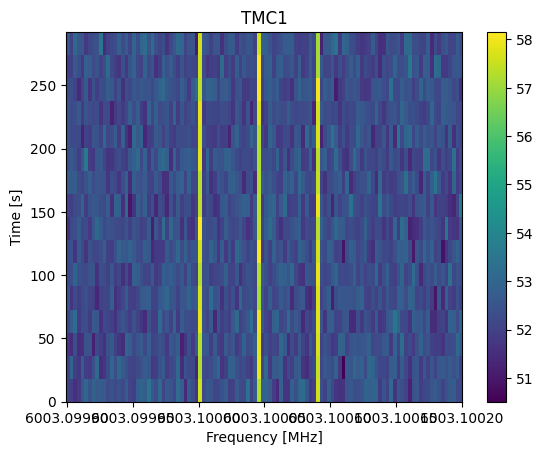

In [6]:
import blimpy as bl
bl.Waterfall(fil, f_start=6003.1-0.0001, f_stop=6003.1002).plot_waterfall()

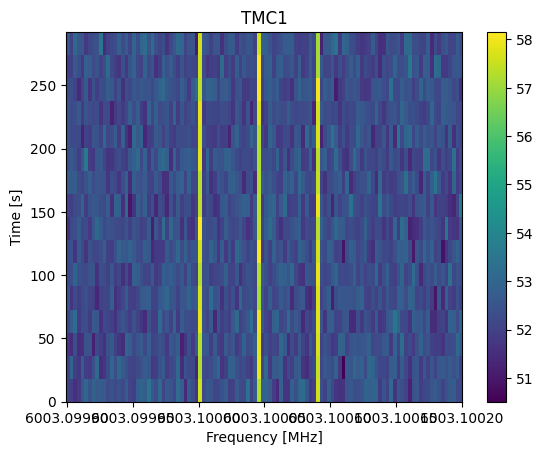

98.72120539133309


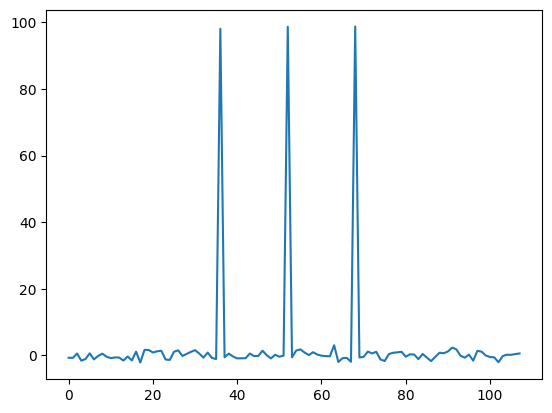

In [14]:
fr = stg.Frame(bl.Waterfall(fil, f_start=6003.1-0.0001, f_stop=6003.1+0.0002))
fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=0)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

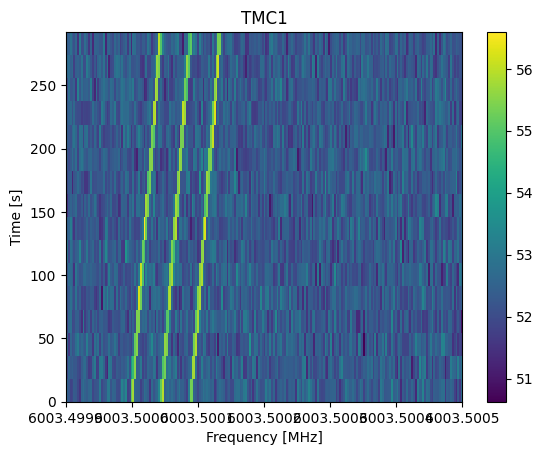

45.3115442195417


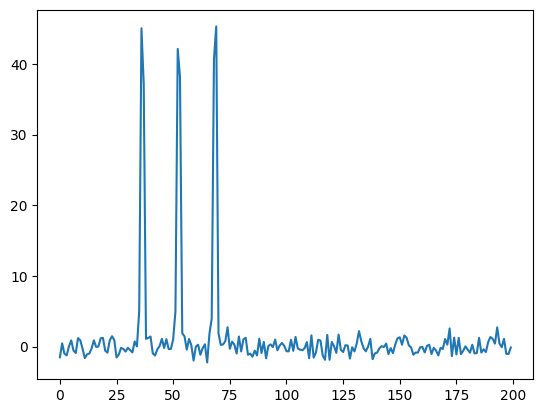

In [17]:
fr = stg.Frame(bl.Waterfall(fil, f_start=6003.5-0.0001, f_stop=6003.5+0.0005))
fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=0.15306383611560062)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

f_start 6003499999.176711


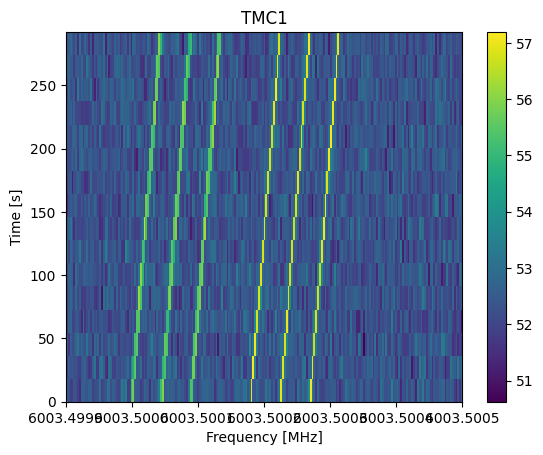

69.10270158509796


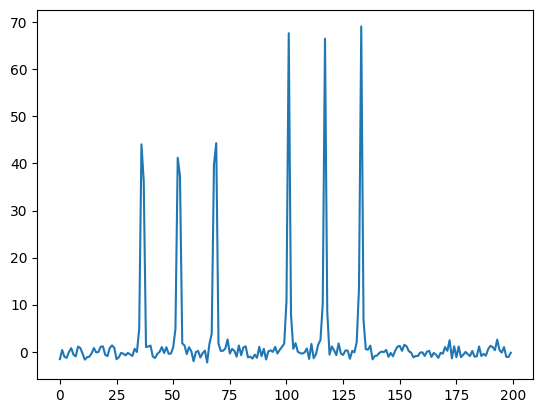

In [54]:
n_subsamples = 1000

fr = stg.Frame(bl.Waterfall(fil, f_start=6003.5-0.0001, f_stop=6003.5+0.0005))

f_start = 6000e6 + int((6003.5e6 - 6000e6) / fr.df) * fr.df+ fr.df/2
print('f_start', f_start)
fr.add_signal(path=stg.constant_path(f_start=f_start + 64*fr.df, drift_rate=0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + (64+16)*fr.df, drift_rate=0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + (64+32)*fr.df, drift_rate=0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)




fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=0.15306383611560062)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

f_start 6003900000.359863


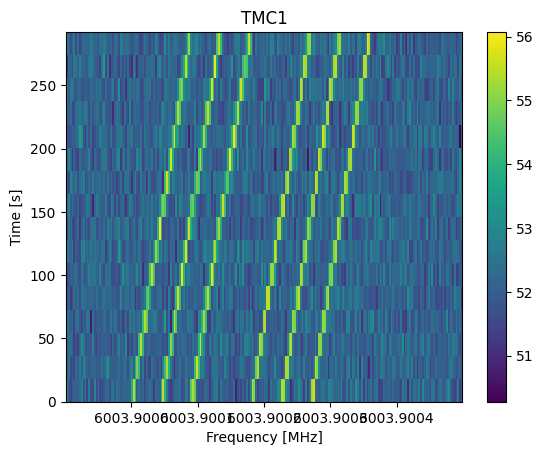

45.66278117562962


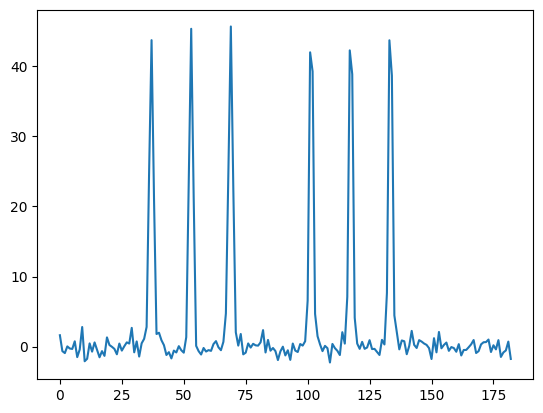

In [49]:
fr = stg.Frame(bl.Waterfall(fil, f_start=6003.9-0.0001, f_stop=6003.9+0.0005))

f_start = 6000e6 + int((6003.9e6 - 6000e6) / fr.df) * fr.df 
print('f_start', f_start)
fr.add_signal(path=stg.constant_path(f_start=f_start + 64*fr.df, drift_rate=2*0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=100)
fr.add_signal(path=stg.constant_path(f_start=f_start + (64+16)*fr.df, drift_rate=2*0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=100)
fr.add_signal(path=stg.constant_path(f_start=f_start + (64+32)*fr.df, drift_rate=2*0.15306383611560062),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=100)

fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=2*0.15306383611560062)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

In [55]:
raw_file = '/datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset'
!rawspec -f 1048576 -t 51 -d /datax/scratch/bbrzycki/data/raw_files/ $raw_file

working stem: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0000.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0001.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0002.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0003.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0004.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0005.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0006.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0007.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0008.raw
opening file: /datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.0009.r

In [7]:
fil = '/datax/scratch/bbrzycki/data/raw_files/doppler_smear_test_gpu_offset.rawspec.0000.fil'
n_subsamples=1000

f_start 6003100312.314928


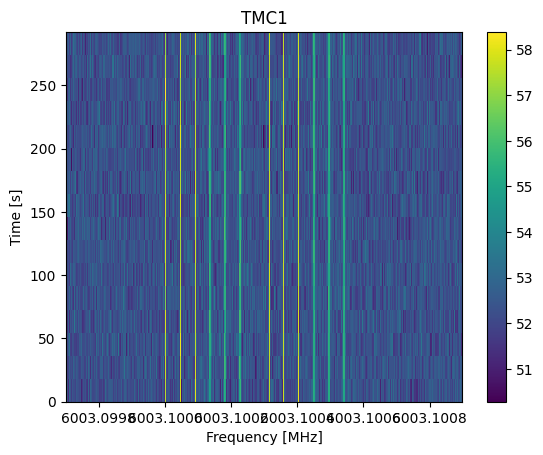

98.74388633534454


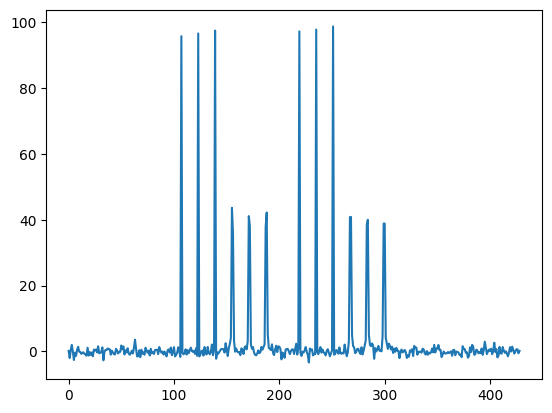

In [15]:
fr = stg.Frame(bl.Waterfall(fil, f_start=6003.1-0.0003, f_stop=6003.1+0.0009))


f_start = 6000e6 + int((6003.1e6 - 6000e6) / fr.df) * fr.df + 96 * fr.df + 16 * fr.df
print('f_start', f_start)
fr.add_signal(path=stg.constant_path(f_start=f_start + 0*fr.df, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 16*fr.df, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 32*fr.df, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 48*fr.df + fr.df/2, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 64*fr.df + fr.df/2, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 80*fr.df + fr.df/2, drift_rate=0),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)








fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=0)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

f_start 6003500310.704112


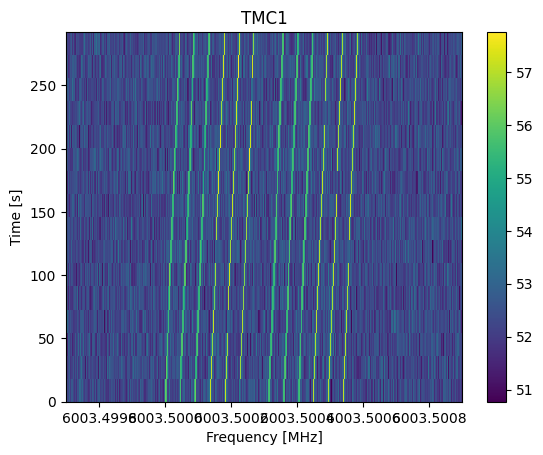

73.73730164173286


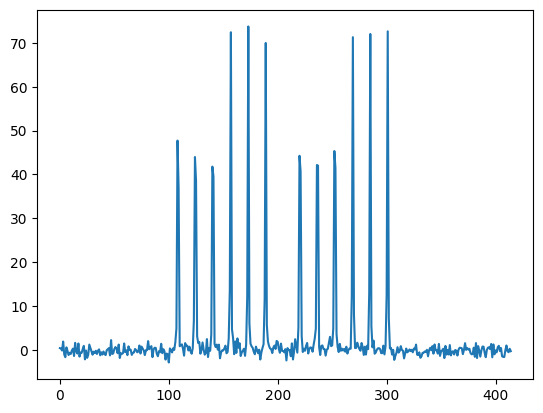

In [13]:

drift_rate=0.15306383611560062


fr = stg.Frame(bl.Waterfall(fil, f_start=6003.5-0.0003, f_stop=6003.5+0.0009))


f_start = 6000e6 + int((6003.5e6 - 6000e6) / fr.df) * fr.df + 96 * fr.df + 16 * fr.df
print('f_start', f_start)
fr.add_signal(path=stg.constant_path(f_start=f_start + 0*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 16*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 32*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 48*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 64*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 80*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)








fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=drift_rate)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()

f_start 6003900311.887264


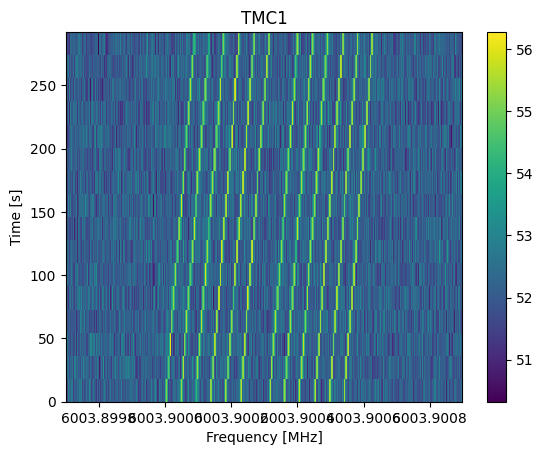

44.60366677910044


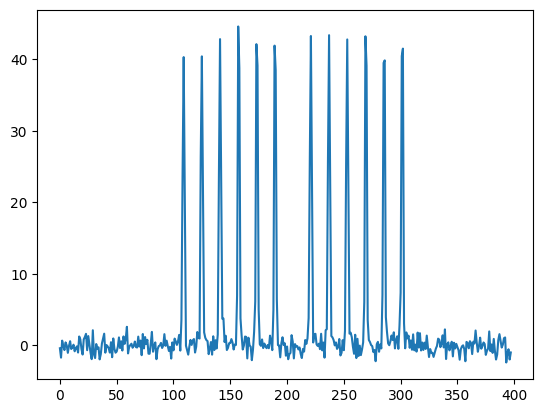

In [14]:

drift_rate=2*0.15306383611560062


fr = stg.Frame(bl.Waterfall(fil, f_start=6003.9-0.0003, f_stop=6003.9+0.0009))


f_start = 6000e6 + int((6003.9e6 - 6000e6) / fr.df) * fr.df + 96 * fr.df + 16 * fr.df
print('f_start', f_start)
fr.add_signal(path=stg.constant_path(f_start=f_start + 0*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 16*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 32*fr.df, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 48*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 64*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)
fr.add_signal(path=stg.constant_path(f_start=f_start + 80*fr.df + fr.df/2, drift_rate=drift_rate),
              t_profile=stg.constant_t_profile(fr.get_intensity(snr=100)),
              f_profile=stg.sinc2_f_profile(width=2*fr.df, width_mode='crossing', trunc=False),
              bp_profile=stg.constant_bp_profile(level=1),
              doppler_smearing=True,
              smearing_subsamples=n_subsamples)








fr.bl_plot()
plt.show()

dd_fr = stg.dedrift(fr, drift_rate=drift_rate)
spec = dd_fr.integrate(normalize=True)
signal_snr = np.max(spec)
print(signal_snr)

plt.plot(spec)
plt.show()